# Import

In [2]:
import data_loader.data_loaders as module_loader
import os
import matplotlib.pyplot as plt
from model.model import *
import torch 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torchsummary import summary as summary
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
from model import loss
import model.model as module_model
import model.loss as module_loss
import model.metric as module_metric
# import logger
from trainer import Trainer
from torch.optim import lr_scheduler
from monai.losses import MaskedDiceLoss, DiceLoss
from monai.metrics import DiceMetric
from monai.networks.nets import SwinUNETR, UNet, RegUNet, AttentionUnet

In [2]:
NUM_CLS=34
train_data_loader =\
    module_loader.CityLoader(
        os.getcwd()+'/data/cityscape', 
        batch_size=10, 
        mode='train') # binary dataset
    
valid_data_loader = \
    module_loader.CityLoader(
        os.getcwd()+'/data/cityscape', 
        batch_size=10, 
        mode='val')

/home/hklee/workspace/torch-segmentation/data/cityscape/leftImg8bit/train /home/hklee/workspace/torch-segmentation/data/cityscape/gtFine/train
/home/hklee/workspace/torch-segmentation/data/cityscape/leftImg8bit/val /home/hklee/workspace/torch-segmentation/data/cityscape/gtFine/val


In [7]:
NUM_CLS=4
train_data_loader =\
    module_loader.SegmentationLoader(
        os.getcwd()+'/data/brain', 
        batch_size=10, 
        mode='train') # binary dataset
    
valid_data_loader = \
    module_loader.SegmentationLoader(
        os.getcwd()+'/data/brain', 
        batch_size=10, 
        mode='val')

/home/hklee/workspace/torch-segmentation/data/brain/images/train /home/hklee/workspace/torch-segmentation/data/brain/masks/train
/home/hklee/workspace/torch-segmentation/data/brain/images/val /home/hklee/workspace/torch-segmentation/data/brain/masks/val


In [4]:
for img ,mask in train_data_loader:
    print(img.shape)
    print(img.dtype)
    print(mask.shape)
    print(mask.dtype)
    print(torch.unique(mask))
    

torch.Size([10, 3, 240, 240])
torch.float32
torch.Size([10, 1, 240, 240])
torch.float32
tensor([0., 1., 2., 3.])
torch.Size([10, 3, 240, 240])
torch.float32
torch.Size([10, 1, 240, 240])
torch.float32
tensor([0., 1., 2., 3.])
torch.Size([10, 3, 240, 240])
torch.float32
torch.Size([10, 1, 240, 240])
torch.float32
tensor([0., 1., 2., 3.])
torch.Size([10, 3, 240, 240])
torch.float32
torch.Size([10, 1, 240, 240])
torch.float32
tensor([0., 1., 2., 3.])
torch.Size([10, 3, 240, 240])
torch.float32
torch.Size([10, 1, 240, 240])
torch.float32
tensor([0., 1., 2., 3.])
torch.Size([10, 3, 240, 240])
torch.float32
torch.Size([10, 1, 240, 240])
torch.float32
tensor([0., 1., 2., 3.])
torch.Size([10, 3, 240, 240])
torch.float32
torch.Size([10, 1, 240, 240])
torch.float32
tensor([0., 1., 2., 3.])
torch.Size([10, 3, 240, 240])
torch.float32
torch.Size([10, 1, 240, 240])
torch.float32
tensor([0., 1., 2., 3.])
torch.Size([10, 3, 240, 240])
torch.float32
torch.Size([10, 1, 240, 240])
torch.float32
tensor([

model.py -> BaseModel 상속으로 바꾸고 학습되는지 보기

In [8]:
# model = U_Net(img_ch=3, output_ch=4).to(device)
	  
model = UNet(
    spatial_dims= 2,
    in_channels=3,
    out_channels=NUM_CLS,
    channels=[64,128,256,512],
    strides=[1,1,1],
    #act='SOFTMAX'
).to(device)
# summary(model, (3, 240, 240))

# Train

In [9]:
# init
EPOCHS = 100
epoch_loss_values = list()
# criterion = torch.nn.BCEWithLogitsLoss()
criterion = getattr(module_loss, 'cross_entropy')
optimizer = optim.Adam(list(model.parameters()), 1e-5)
val_interval = 5

In [10]:
for epoch in range(EPOCHS):
    epoch_loss = 0.0
    
    model.train() # switch to train mode
    for step, batch in enumerate(tqdm(train_data_loader)):
        inputs, labels = batch
        # inputs = inputs.type('torch.FloatTensor')
        # labels = labels.type('torch.FloatTensor')
        inputs = inputs.to(device)
        labels = labels.to(device) 

        # forward + backward + optimizer 최적화
        outputs = model(inputs)
        loss = criterion(outputs, labels) # loss 계산
        
        optimizer.zero_grad() # gradient(변화도) 0으로 만들고
        loss.backward() # 역전파
        optimizer.step()

        epoch_loss += loss.item()
        
    epoch_loss /= step
    epoch_loss_values.append(epoch_loss)    
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    if (epoch + 1) % val_interval == 0 :
        model.eval()
        with torch.no_grad():
            print('check interval!')
            print(module_metric.accuracy(outputs, labels))
        
print("finished")


100%|██████████| 43/43 [00:17<00:00,  2.50it/s]


epoch 1 average loss: 1.7872


100%|██████████| 43/43 [00:15<00:00,  2.82it/s]


epoch 2 average loss: 1.0899


100%|██████████| 43/43 [00:16<00:00,  2.67it/s]


epoch 3 average loss: 0.8902


100%|██████████| 43/43 [00:16<00:00,  2.65it/s]


epoch 4 average loss: 0.7712


100%|██████████| 43/43 [00:16<00:00,  2.66it/s]


epoch 5 average loss: 0.6743
check interval!
223615.5


100%|██████████| 43/43 [00:16<00:00,  2.64it/s]


epoch 6 average loss: 0.6056


100%|██████████| 43/43 [00:15<00:00,  2.77it/s]


epoch 7 average loss: 0.5357


100%|██████████| 43/43 [00:16<00:00,  2.64it/s]


epoch 8 average loss: 0.4925


100%|██████████| 43/43 [00:16<00:00,  2.64it/s]


epoch 9 average loss: 0.4344


100%|██████████| 43/43 [00:16<00:00,  2.63it/s]


epoch 10 average loss: 0.4078
check interval!
223351.75


100%|██████████| 43/43 [00:16<00:00,  2.63it/s]


epoch 11 average loss: 0.3752


100%|██████████| 43/43 [00:16<00:00,  2.63it/s]


epoch 12 average loss: 0.3388


100%|██████████| 43/43 [00:16<00:00,  2.63it/s]


epoch 13 average loss: 0.3315


100%|██████████| 43/43 [00:16<00:00,  2.62it/s]


epoch 14 average loss: 0.3064


100%|██████████| 43/43 [00:16<00:00,  2.63it/s]


epoch 15 average loss: 0.3018
check interval!
224945.5


100%|██████████| 43/43 [00:16<00:00,  2.63it/s]


epoch 16 average loss: 0.2806


100%|██████████| 43/43 [00:16<00:00,  2.62it/s]


epoch 17 average loss: 0.2732


100%|██████████| 43/43 [00:16<00:00,  2.63it/s]


epoch 18 average loss: 0.2636


100%|██████████| 43/43 [00:16<00:00,  2.62it/s]


epoch 19 average loss: 0.2592


100%|██████████| 43/43 [00:16<00:00,  2.63it/s]


epoch 20 average loss: 0.2313
check interval!
222482.25


100%|██████████| 43/43 [00:16<00:00,  2.63it/s]


epoch 21 average loss: 0.2321


100%|██████████| 43/43 [00:16<00:00,  2.64it/s]


epoch 22 average loss: 0.2204


100%|██████████| 43/43 [00:16<00:00,  2.63it/s]


epoch 23 average loss: 0.2117


100%|██████████| 43/43 [00:16<00:00,  2.63it/s]


epoch 24 average loss: 0.2033


100%|██████████| 43/43 [00:16<00:00,  2.63it/s]


epoch 25 average loss: 0.1955
check interval!
226619.0


100%|██████████| 43/43 [00:16<00:00,  2.63it/s]


epoch 26 average loss: 0.1901


100%|██████████| 43/43 [00:16<00:00,  2.63it/s]


epoch 27 average loss: 0.1809


100%|██████████| 43/43 [00:16<00:00,  2.62it/s]


epoch 28 average loss: 0.1757


100%|██████████| 43/43 [00:16<00:00,  2.62it/s]


epoch 29 average loss: 0.1661


100%|██████████| 43/43 [00:16<00:00,  2.62it/s]


epoch 30 average loss: 0.1659
check interval!
226711.75


100%|██████████| 43/43 [00:16<00:00,  2.63it/s]


epoch 31 average loss: 0.1584


100%|██████████| 43/43 [00:16<00:00,  2.61it/s]


epoch 32 average loss: 0.1586


100%|██████████| 43/43 [00:16<00:00,  2.60it/s]


epoch 33 average loss: 0.1484


100%|██████████| 43/43 [00:16<00:00,  2.59it/s]


epoch 34 average loss: 0.1461


100%|██████████| 43/43 [00:16<00:00,  2.60it/s]


epoch 35 average loss: 0.1382
check interval!
223335.0


100%|██████████| 43/43 [00:16<00:00,  2.60it/s]


epoch 36 average loss: 0.1388


100%|██████████| 43/43 [00:16<00:00,  2.60it/s]


epoch 37 average loss: 0.1358


100%|██████████| 43/43 [00:16<00:00,  2.60it/s]


epoch 38 average loss: 0.1350


100%|██████████| 43/43 [00:16<00:00,  2.58it/s]


epoch 39 average loss: 0.1301


100%|██████████| 43/43 [00:16<00:00,  2.59it/s]


epoch 40 average loss: 0.1283
check interval!
223364.5


100%|██████████| 43/43 [00:16<00:00,  2.58it/s]


epoch 41 average loss: 0.1255


100%|██████████| 43/43 [00:16<00:00,  2.58it/s]


epoch 42 average loss: 0.1266


100%|██████████| 43/43 [00:16<00:00,  2.58it/s]


epoch 43 average loss: 0.1233


100%|██████████| 43/43 [00:16<00:00,  2.57it/s]


epoch 44 average loss: 0.1193


100%|██████████| 43/43 [00:16<00:00,  2.57it/s]


epoch 45 average loss: 0.1178
check interval!
222222.25


100%|██████████| 43/43 [00:16<00:00,  2.57it/s]


epoch 46 average loss: 0.1175


100%|██████████| 43/43 [00:16<00:00,  2.57it/s]


epoch 47 average loss: 0.1168


100%|██████████| 43/43 [00:16<00:00,  2.57it/s]


epoch 48 average loss: 0.1148


100%|██████████| 43/43 [00:16<00:00,  2.58it/s]


epoch 49 average loss: 0.1136


100%|██████████| 43/43 [00:16<00:00,  2.58it/s]


epoch 50 average loss: 0.1145
check interval!
222229.75


100%|██████████| 43/43 [00:16<00:00,  2.57it/s]


epoch 51 average loss: 0.1150


100%|██████████| 43/43 [00:16<00:00,  2.57it/s]


epoch 52 average loss: 0.1070


100%|██████████| 43/43 [00:16<00:00,  2.57it/s]


epoch 53 average loss: 0.1093


100%|██████████| 43/43 [00:16<00:00,  2.59it/s]


epoch 54 average loss: 0.1052


100%|██████████| 43/43 [00:16<00:00,  2.58it/s]


epoch 55 average loss: 0.1059
check interval!
228971.5


100%|██████████| 43/43 [00:16<00:00,  2.59it/s]


epoch 56 average loss: 0.1067


100%|██████████| 43/43 [00:16<00:00,  2.59it/s]


epoch 57 average loss: 0.1048


100%|██████████| 43/43 [00:16<00:00,  2.57it/s]


epoch 58 average loss: 0.1064


100%|██████████| 43/43 [00:16<00:00,  2.60it/s]


epoch 59 average loss: 0.1068


100%|██████████| 43/43 [00:16<00:00,  2.59it/s]


epoch 60 average loss: 0.1023
check interval!
227577.5


100%|██████████| 43/43 [00:16<00:00,  2.59it/s]


epoch 61 average loss: 0.1014


100%|██████████| 43/43 [00:16<00:00,  2.59it/s]


epoch 62 average loss: 0.0993


100%|██████████| 43/43 [00:16<00:00,  2.59it/s]


epoch 63 average loss: 0.1012


100%|██████████| 43/43 [00:16<00:00,  2.59it/s]


epoch 64 average loss: 0.0995


100%|██████████| 43/43 [00:16<00:00,  2.59it/s]


epoch 65 average loss: 0.1023
check interval!
221632.0


100%|██████████| 43/43 [00:16<00:00,  2.58it/s]


epoch 66 average loss: 0.0956


100%|██████████| 43/43 [00:16<00:00,  2.66it/s]


epoch 67 average loss: 0.0971


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 68 average loss: 0.1034


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 69 average loss: 0.0988


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 70 average loss: 0.0970
check interval!
226572.75


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 71 average loss: 0.0949


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 72 average loss: 0.0986


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 73 average loss: 0.0963


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 74 average loss: 0.0966


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 75 average loss: 0.0947
check interval!
225626.0


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 76 average loss: 0.0948


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 77 average loss: 0.0989


100%|██████████| 43/43 [00:15<00:00,  2.81it/s]


epoch 78 average loss: 0.0906


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 79 average loss: 0.0941


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 80 average loss: 0.0910
check interval!
229254.0


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 81 average loss: 0.0938


100%|██████████| 43/43 [00:15<00:00,  2.81it/s]


epoch 82 average loss: 0.0925


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 83 average loss: 0.0908


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 84 average loss: 0.0919


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 85 average loss: 0.0902
check interval!
224086.25


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 86 average loss: 0.0932


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 87 average loss: 0.0888


100%|██████████| 43/43 [00:15<00:00,  2.81it/s]


epoch 88 average loss: 0.0886


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 89 average loss: 0.0949


100%|██████████| 43/43 [00:15<00:00,  2.81it/s]


epoch 90 average loss: 0.0891
check interval!
229724.0


100%|██████████| 43/43 [00:15<00:00,  2.80it/s]


epoch 91 average loss: 0.0870


100%|██████████| 43/43 [00:16<00:00,  2.65it/s]


epoch 92 average loss: 0.0898


100%|██████████| 43/43 [00:16<00:00,  2.67it/s]


epoch 93 average loss: 0.0910


100%|██████████| 43/43 [00:16<00:00,  2.67it/s]


epoch 94 average loss: 0.0900


100%|██████████| 43/43 [00:15<00:00,  2.76it/s]


epoch 95 average loss: 0.0885
check interval!
224569.5


100%|██████████| 43/43 [00:16<00:00,  2.56it/s]


epoch 96 average loss: 0.0926


100%|██████████| 43/43 [00:16<00:00,  2.55it/s]


epoch 97 average loss: 0.0889


100%|██████████| 43/43 [00:16<00:00,  2.55it/s]


epoch 98 average loss: 0.0878


100%|██████████| 43/43 [00:17<00:00,  2.53it/s]


epoch 99 average loss: 0.0868


100%|██████████| 43/43 [00:16<00:00,  2.55it/s]

epoch 100 average loss: 0.0876
check interval!
227053.5
finished


# Inference

In [16]:
dataset = 'brain'

if dataset=='brain':
    test_loader = \
        module_loader.SegmentationLoader(
            os.getcwd()+'/data/brain', 
            batch_size=10, 
            mode='test')
elif dataset == 'city':
    test_loader = \
        module_loader.CityLoader(
            os.getcwd()+'/data/cityscape', 
            batch_size=10, 
            mode='test')
    
for i in test_loader:
    print(i[0].shape)
    break

/home/hklee/workspace/torch-segmentation/data/brain/images/test /home/hklee/workspace/torch-segmentation/data/brain/masks/test
torch.Size([10, 3, 240, 240])


In [27]:
iter_ = iter(test_loader)
img, mask = next(iter_)
print(img.shape)
# print(torch.unique(img))
print(mask.shape)
print(torch.unique(mask))

torch.Size([10, 3, 240, 240])
torch.Size([10, 1, 240, 240])
tensor([0., 1., 2., 3.])


In [35]:
for img, mask in test_loader:
    img = img.to(device)
    outputs = model(img)
    break

print(outputs.shape)

torch.Size([10, 4, 240, 240])


In [38]:
mode = 'Multi'
outputs = outputs.to('cpu')
if mode ==  'Binary':
    outputs = torch.sigmoid(outputs)
    outputs = (outputs > 0.5).float()
else :
    outputs = torch.argmax(outputs, dim=1)

In [ ]:
numpy_outputs = outputs.to('cpu').detach().numpy()
print(numpy_outputs.shape)
plt.figure(figsize=(50,20))
for i in range(10):
    plt.subplot(2, 5, i+1)
    # chaneg the shape
    # result = outputs[i, :, :, :].squeeze()
    result = numpy_outputs[i, :, :].squeeze()
    print(result.shape)
    plt.imshow(result, cmap='hot')
    plt.axis('off')
    
plt.show()

In [ ]:
file_name = 'city_monai_unet_epoch10.png'
torchvision.utils.save_image(outputs[0].unsqueeze(dim=1), f'./saved/inference_result_img/{file_name}', nrow=5)

In [32]:
img = img.to('cpu')
img = img.detach().numpy()
print(img.shape)

(10, 3, 240, 240)


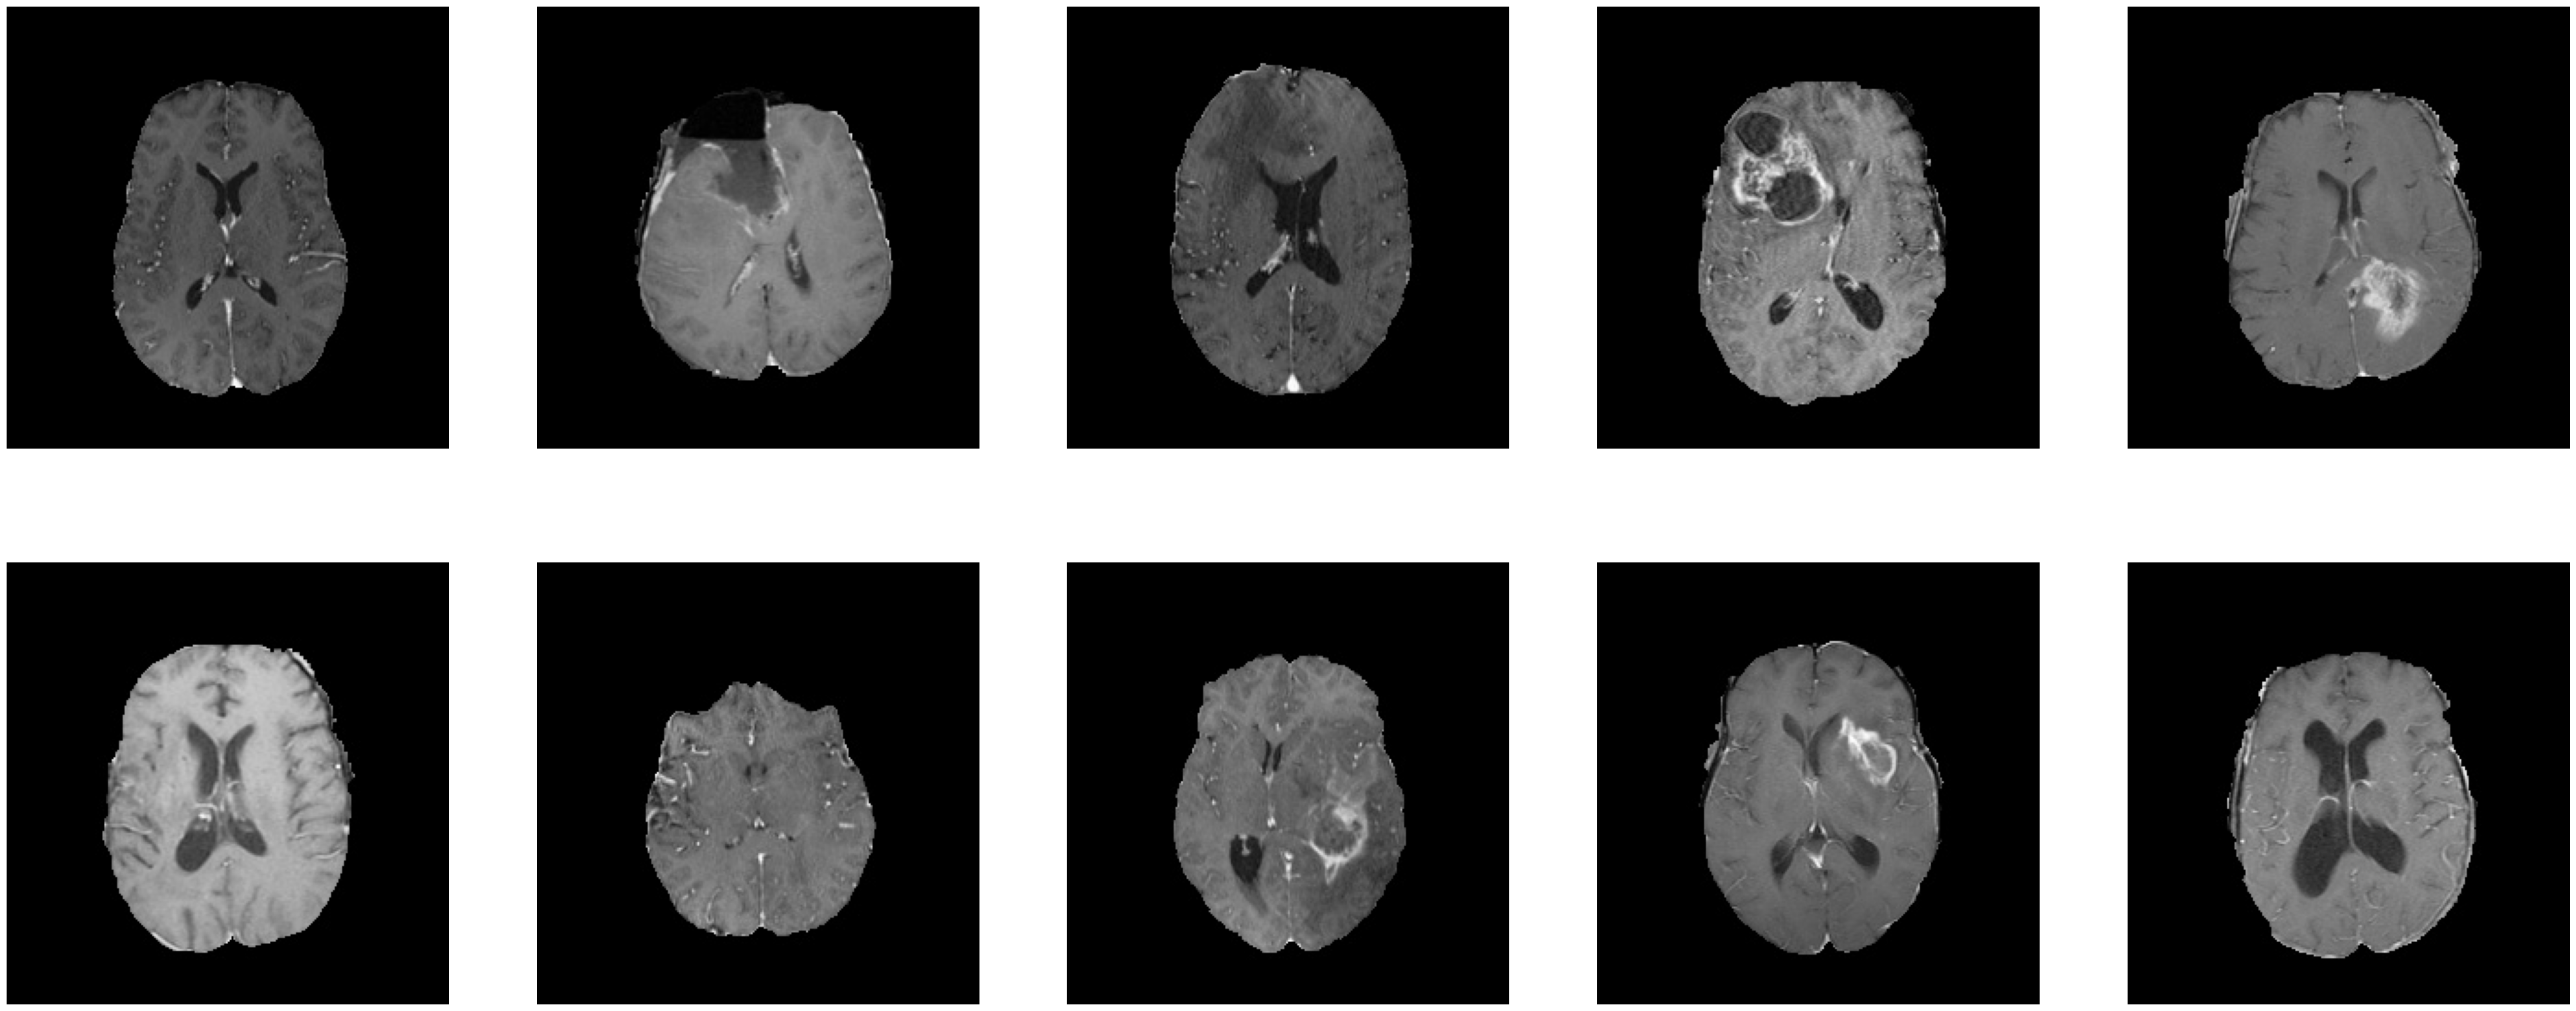

In [33]:
plt.figure(figsize=(50,20))
for i in range(10):
    plt.subplot(2, 5, i+1)
    result = img[i, :, :, :].squeeze()
    result = result.transpose(1,2,0)
    plt.imshow(result, cmap='bone')
    plt.axis('off')
    
plt.show()


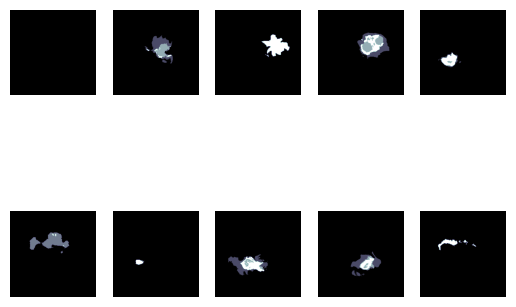

In [34]:
mask = mask.to('cpu').detach().numpy()
for i in range(10):
    plt.subplot(2, 5, i+1)
    result = mask[i, :, :].squeeze()
    # result = result.transpose(1,2,0)
    plt.imshow(result, cmap='bone')
    plt.axis('off')
    
plt.show()

# Monai Test

In [ ]:
from monai.losses import DiceLoss
from monai.metrics import DiceMetric
from monai.networks.nets import SwinUNETR, UNet, RegUNet, AttentionUnet

model = UNet(
    spatial_dims= 2,
    in_channels=3,
    out_channels=1,
    channels=[64,128,256,512],
    strides=[1,1,1]
)

In [ ]:
a = np.zeros(shape=(240,240))

In [ ]:
t = torch.tensor(a)
t.shape
t = torch.unsqueeze(t, 0)
t.shape

In [ ]:
model.to(device)

In [ ]:
summary(model, (3, 240, 240))

# Dataset, DataLoader

In [ ]:
from data_loader.dataset import SegmentationDataset, MultiClassSegmentationDataset
from data_loader.data_loaders import SegmentationLoader, get_loader
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_loader = SegmentationLoader(data_dir = './data',
                                   batch_size = 10,
                                   mode='train',
                                   image_size=240)

In [ ]:
iter_ = iter(train_loader)
data=  next(iter_)

In [ ]:
image, mask = data
print(type(image))
print(image.dtype)
print(image.shape)
print(type(mask))
print(mask.dtype)
print(mask.shape)
torch.unique(mask)


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 10, figsize=(20,20))

for i in range(10):
    ax1[i].imshow(image[i, :, :, :].permute(1,2,0))
    ax2[i].imshow(mask[i,0,:,:])
    ax1[i].axis('off')
    ax2[i].axis('off')
    
plt.tight_layout()
plt.show()

In [ ]:
from data_loader.augmentation import get_train_augmentation, get_valid_augmentation
from PIL import Image

class TestDataset(SegmentationDataset):
    def __init__(self, data_path, mode='train', image_size=240):
        super().__init__(data_path, mode, image_size)
        
    def __getitem__(self, idx):
        image_path = self.images[idx]
        filename = image_path.split('/')[-1].replace('jpg', 'png')
        mask_path = os.path.join(self.mask_path, filename)

        image = np.array(Image.open(image_path).convert('RGB'), dtype=np.float32)
        mask = np.array(Image.open(mask_path).convert('L'), dtype=np.float32)

        # 전처리, augmentation
        augmentation = self.aug(image=image, mask=mask)
        image = augmentation['image'] / 255.0
        mask = augmentation['mask']
        mask[mask == 255.0] = 1.0   
        mask = mask.unsqueeze(0)
        return image, mask

In [ ]:
brain = TestDataset('./data', 'val', 240)
img, mask = brain.__getitem__(5)
print(img.shape)
print(mask.shape)

In [ ]:
class MultiClassSegmentationDataset(SegmentationDataset):
    def __init__(self, data_path, mode='train', image_size=240):
        super().__init__(data_path=data_path,
                         mode=mode,
                         image_size=image_size)
        
    def __getitem__(self, idx):
        image, mask = super().__getitem__(idx)
        mask = mask.squeeze().to(torch.int64)
        mask = F.one_hot(mask)
        mask = mask.permute(2,0,1)
        return image, mask

In [ ]:
brain_dataset = MultiClassSegmentationDataset(data_path='./data',
                                            mode='train',
                                            image_size=240)
img, mask = brain_dataset.__getitem__(5)
print(img.shape)
print(mask.shape)


In [ ]:
argmax_mask = torch.argmax(mask, dim=0)
plt.imshow(argmax_mask, cmap='hot')

# Multiclass sementic segmentation

In [ ]:
import torch

In [ ]:
cls_one = torch.tensor([[0,0,0], [0,1,0],[0,1,0]])
print(cls_one.shape)
cls_two = torch.tensor([[1,1,1], [0,0,0], [0,0,0]])
print(cls_two.shape)
cls_three = torch.tensor([[0,0,0], [1,0,0], [1,0,0]])
print(cls_three.shape)
cls_four = torch.tensor([[0,0,0], [0,0,1], [0,0,1]])
print(cls_four.shape)
sample_mask = torch.stack([cls_one, cls_two, cls_three, cls_four])
print(sample_mask.shape)

In [ ]:
argmax_mask = torch.argmax(sample_mask, dim=0)
argmax_mask

In [ ]:
plt.imshow(argmax_mask)

In [ ]:
m = torch.nn.functional.one_hot(argmax_mask)
preprocessed_m = m.permute(2,0,1)
print(preprocessed_m.shape)
preprocessed_m

In [ ]:
preprocessed_m.shape